In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distrubuted between (-3, 3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function
<center>y=cos(2x<sub>1</sub>)+cos(3x<sub>2</sub>)</center>

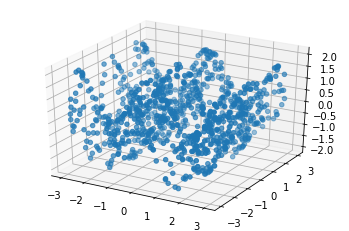

In [12]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [13]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [14]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 438us/sample - loss: 0.9694
Epoch 2/100
1000/1000 [==============================] - 0s 59us/sample - loss: 0.9108
Epoch 3/100
1000/1000 [==============================] - 0s 55us/sample - loss: 0.9009
Epoch 4/100
1000/1000 [==============================] - 0s 62us/sample - loss: 0.8604
Epoch 5/100
1000/1000 [==============================] - 0s 54us/sample - loss: 0.7943
Epoch 6/100
1000/1000 [==============================] - 0s 59us/sample - loss: 0.7518
Epoch 7/100
1000/1000 [==============================] - 0s 56us/sample - loss: 0.7029
Epoch 8/100
1000/1000 [==============================] - 0s 60us/sample - loss: 0.6430
Epoch 9/100
1000/1000 [==============================] - 0s 59us/sample - loss: 0.6148
Epoch 10/100
1000/1000 [==============================] - 0s 64us/sample - loss: 0.5708
Epoch 11/100
1000/1000 [==============================] - 0s 58us/sample - loss: 0.5880
Epoch 12/100
1000/

Epoch 94/100
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0085
Epoch 95/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0136
Epoch 96/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0169
Epoch 97/100
1000/1000 [==============================] - 0s 57us/sample - loss: 0.0186
Epoch 98/100
1000/1000 [==============================] - 0s 61us/sample - loss: 0.0116
Epoch 99/100
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0276
Epoch 100/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0155


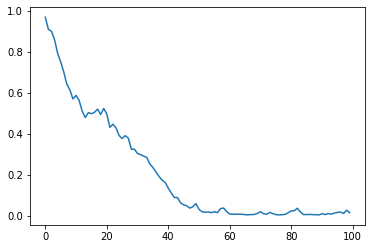

In [15]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

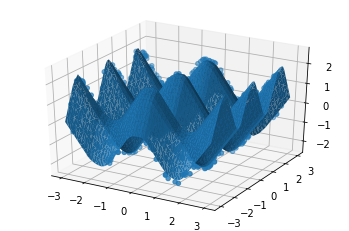

In [19]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

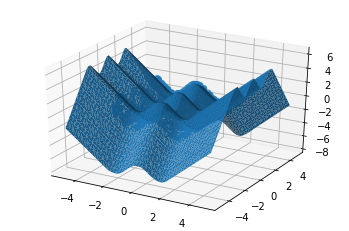

In [20]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()